<a href="https://colab.research.google.com/github/hyeonji826/Linear-Algebra/blob/main/4_Factorization_into_A_%3DLU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Factorization into A = LU

## 1. Introduction
LU 분해(Factorization)는 정사각 행렬 `A` 를 두 개의 행렬 `L` (Lower triangular matrix)과 `U` (Upper triangular matrix)의 곱으로 표현하는 기법이다. 즉,

```python
A = LU
```

이 성립한다. 이를 활용하면 선형 방정식 풀이, 행렬식 계산, 역행렬 구하기 등의 연산을 효율적으로 수행할 수 있다.

## 2. LU Factorization Process
LU 분해 과정은 아래와 같다.

1. **행렬 A를 설정한다.**

```python
import numpy as np

A = np.array([[2, 3, 1],
              [4, 7, 3],
              [-2, 3, 4]])
print("A =\n", A)
```

2. **행 연산을 통해 A를 삼각 행렬로 변환한다.**
   - 첫 번째 열을 기준으로 가우스 소거법을 수행하여 `U` 행렬을 얻는다.
   - 이때, 수행한 연산을 기록하여 `L` 행렬을 생성한다.

3. **결과적으로 아래와 같은 형태의 LU 분해를 얻는다.**

```python
from scipy.linalg import lu

P, L, U = lu(A)
print("L =\n", L)
print("U =\n", U)
```

이때, `L` 행렬은 단위 하삼각행렬(lower triangular matrix with ones on the diagonal), `U` 행렬은 상삼각행렬(upper triangular matrix)이다.

## 3. Application of LU Factorization
LU 분해는 다양한 응용이 가능하다.

- **선형 방정식 풀이:**
  - 주어진 방정식 `Ax = b` 에 대해, 먼저 `Ly = b` 를 풀고, 이후 `Ux = y` 를 푼다.

```python
b = np.array([5, 9, 4])
y = np.linalg.solve(L, b)
x = np.linalg.solve(U, y)
print("Solution x =", x)
```

- **행렬식 계산:**
  - `A = LU` 일 때, `det(A) = det(L) * det(U)` 가 성립하며, `L` 의 대각 원소가 1이므로 `det(A) = det(U)` 로 쉽게 계산할 수 있다.

```python
det_A = np.linalg.det(U)
print("det(A) =", det_A)
```

- **역행렬 계산:**
  - `A^{-1} = U^{-1} * L^{-1}` 를 이용하여 역행렬을 구할 수 있다.

```python
A_inv = np.linalg.inv(U) @ np.linalg.inv(L)
print("A_inv =\n", A_inv)
```

## 4. Summary
LU 분해는 정사각 행렬을 하삼각행렬과 상삼각행렬의 곱으로 분해하는 기법으로, 선형 시스템 해법, 행렬식 계산, 역행렬 구하기 등 다양한 응용이 가능하다. 특히 계산을 효율적으로 수행할 수 있어 수치해석에서 중요한 개념이다.


In [2]:
# LU 분해 및 시각화 실습
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.linalg import lu



In [5]:
# 1. 행렬 A 설정
A = np.array([[2,3,1],
              [4,7,3],
              [-2,3,4]])
print("Matrix A:\n",A)

# 2. LU 분해 수행
# P : Permutation , L : Lower Triangular , U : Upper Triangular
P, L ,U = lu(A)
print("\nLower Triangular Matrix L:\n",L)
print("\nUpper Triangular Matrix L:\n",U)
print("\nPermutation Matrix L:\n",P)

# 3. 행렬 시각화 함수
def plot_matrix(matrix,title):
    plt.figure(figsize=(4,4))
    sns.heatmap(matrix, annot=True,cmap='coolwarm',cbar=False,linewidths=1)
    plt.title(title)
    plt.show()


Matrix A:
 [[ 2  3  1]
 [ 4  7  3]
 [-2  3  4]]

Lower Triangular Matrix L:
 [[ 1.          0.          0.        ]
 [-0.5         1.          0.        ]
 [ 0.5        -0.07692308  1.        ]]

Upper Triangular Matrix L:
 [[ 4.          7.          3.        ]
 [ 0.          6.5         5.5       ]
 [ 0.          0.         -0.07692308]]

Permutation Matrix L:
 [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


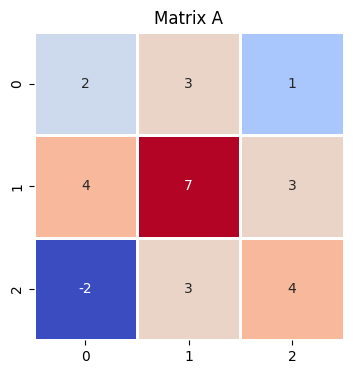

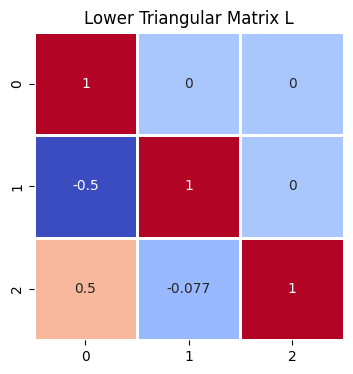

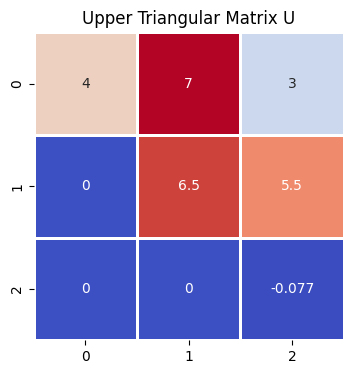

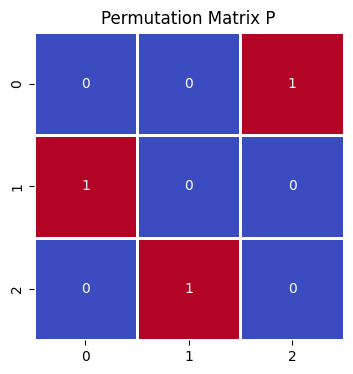


Solution x: [-72.5  84.  -98. ]


In [7]:
# 4. LU 분해 및 P 행렬 시각화
plot_matrix(A,"Matrix A")
plot_matrix(L,"Lower Triangular Matrix L")
plot_matrix(U,"Upper Triangular Matrix U")
plot_matrix(P,"Permutation Matrix P")

# 5. LU 분해 활용 예제
b = np.array([5,9,4])

# Ly = pb 풀이
y = np.linalg.solve(L,P@b)
# Ux = y 풀이
x = np.linalg.solve(U,y)

print("\nSolution x:",x)



In [10]:
# 행렬식 계산
# det(A) = det(U)
det_A = np.linalg.det(U)
print("\ndet(A)=",det_A)

# 역행렬 계산
A_inv = np.linalg.inv(U) @ np.linalg.inv(L)
print("\nInverse of A:\n",A_inv)


det(A)= -1.9999999999999984

Inverse of A:
 [[  4.5  -1.   -9.5]
 [ -5.    1.   11. ]
 [  6.   -1.  -13. ]]
